In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [24]:
import h5py
subhalo = h5py.File('/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/groups_127/fof_subhalo_tab_127.0.hdf5','r')
list(subhalo.get('Header').attrs.keys())

['BoxSize',
 'FlagDoubleprecision',
 'Git_commit',
 'Git_date',
 'HubbleParam',
 'Ngroups_ThisFile',
 'Ngroups_Total',
 'Nids_ThisFile',
 'Nids_Total',
 'Nsubgroups_ThisFile',
 'Nsubgroups_Total',
 'NumFiles',
 'Omega0',
 'OmegaLambda',
 'Redshift',
 'Time']

#### Aca vemos cuantos grupos y subhalos hay en los grupos

In [25]:
Ngroups_Total = subhalo.get('Header').attrs['Ngroups_Total']
print (Ngroups_Total)
Nsubgroups_Total = subhalo.get('Header').attrs['Nsubgroups_Total']
print (Nsubgroups_Total)

132641
81461


#### Aca leo las masas y posiciones de los halos para sacar los mas masivos

In [4]:
%%time
import gc
import h5py
import numpy as np

dir_path = '/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/groups_127/'

SubMass = []
SubPos = []

for i in range(0,8):
    snap = h5py.File(dir_path + 'fof_subhalo_tab_127.'+ str('%s'%i) +'.hdf5','r')
#     gr_mass = snap['Group/GroupMass'][()]
#     gr_pos  = snap['Group/GroupPos'][()]
#     gr_Nsub = snap['Group/GroupNsubs'][()]
    sub_mass = snap['Subhalo/SubhaloMass'][()]  
    sub_pos  = snap['Subhalo/SubhaloPos'][()]
    
    SubMass.append(sub_mass)
    SubPos.append(sub_pos)
    
SubMass = np.concatenate(SubMass)
SubPos  = np.concatenate(SubPos)

gc.collect()


CPU times: user 74.8 ms, sys: 77 ms, total: 152 ms
Wall time: 182 ms


44

#### Seleccionamos los 20 halos mas masivos

In [6]:
mask = np.argsort(SubMass)

SMass = SubMass[mask][::-1]*1e10

print (SMass[:20])

[1.57527586e+12 1.16998734e+12 5.75789335e+11 5.55212800e+11
 2.35702452e+11 1.81163065e+11 1.61315209e+11 1.48673790e+11
 1.44135864e+11 1.43819964e+11 1.33386396e+11 1.26789853e+11
 1.21189327e+11 1.01114544e+11 9.09461750e+10 8.68756685e+10
 7.65613261e+10 7.44905114e+10 7.35222088e+10 6.67219395e+10]


In [23]:
#Posicion de los 20 halos mas masivos
H_pos = SubPos[mask][::-1][:20]
print (H_pos)

[[48.81521  46.704514 53.605064]
 [48.71576  47.06235  53.33718 ]
 [46.974728 49.455475 51.771206]
 [47.528534 46.364803 54.832882]
 [47.325207 47.259197 51.91327 ]
 [47.791496 47.55743  53.327   ]
 [47.41012  48.306732 52.663097]
 [49.867104 47.25419  52.225414]
 [45.62381  46.928238 54.103687]
 [48.525105 48.03401  51.99552 ]
 [46.99904  49.67544  51.441345]
 [46.84732  46.249157 55.38245 ]
 [46.91023  50.354965 50.480793]
 [47.561237 48.625153 52.28775 ]
 [46.062164 50.05576  51.221386]
 [49.608597 44.904526 55.67278 ]
 [50.032932 44.561493 56.25295 ]
 [46.900036 49.43922  51.809025]
 [49.73617  41.36179  58.553463]
 [46.810642 50.414043 50.400394]]


#### Leo las posiciones de las particulas y los demas datos

In [20]:
%%time
import gc
import joblib
import h5py
import pathlib
import numpy as np

dir_path = '/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/snapdir_127/'

StrPos  = []
StrMass = []
StrVel  = []
StrID   = []
StrMet  = []
StrTMet = []

GasPos  = []
GasMass = []
GasVel  = []
GasID   = []
GasMet  = []
GasTMet = []

DrkPos  = []
DrkMass = []
DrkVel  = []
DrkID   = []

for i in range(0,8):
    snap = h5py.File(dir_path + 'snapshot_127.'+ str('%s'%i) +'.hdf5','r')
    
    #stars
    pos_str    = snap['PartType4/Coordinates'][()]
    mass_str   = snap['PartType4/Masses'][()]
    vel_str    = snap['PartType4/Velocities'][()]
    ID_str     = snap['PartType4/ParticleIDs'][()]
    metal_str  = snap['PartType4/GFM_Metals'][()]
    totmet_str = snap['PartType4/GFM_Metallicity'][()]
    
    StrPos.append(pos_str)
    StrMass.append(mass_str)
    StrVel.append(vel_str)
    StrID.append(ID_str)
    StrMet.append(metal_str)
    StrTMet.append(totmet_str)

    #gas
    pos_gas    = snap['PartType0/Coordinates'][()]
    mass_gas   = snap['PartType0/Masses'][()]
    vel_gas    = snap['PartType0/Velocities'][()]
    ID_gas     = snap['PartType0/ParticleIDs'][()]
    metal_gas  = snap['PartType0/GFM_Metals'][()]
    totmet_gas = snap['PartType0/GFM_Metallicity'][()]
    
    GasPos.append(pos_gas)
    GasMass.append(mass_gas)
    GasVel.append(vel_gas)
    GasID.append(ID_gas)
    GasMet.append(metal_gas)
    GasTMet.append(totmet_gas)

    #dark matter
    pos_drk    = snap['PartType1/Coordinates'][()]
    mass_drk   = snap['PartType1/Masses'][()]
    vel_drk    = snap['PartType1/Velocities'][()]
    ID_drk     = snap['PartType1/ParticleIDs'][()]
    
    DrkPos.append(pos_drk)
    DrkMass.append(mass_drk)
    DrkVel.append(vel_drk)
    DrkID.append(ID_drk)

    
a = snap.get('Header').attrs['Time']
h = snap.get('Header').attrs['HubbleParam']

StrPos  = np.concatenate(StrPos)
StrMass = np.concatenate(StrMass)
StrVel  = np.concatenate(StrVel)
StrID   = np.concatenate(StrID)
StrMet  = np.concatenate(StrMet)
StrTMet = np.concatenate(StrTMet)

GasPos  = np.concatenate(GasPos)
GasMass = np.concatenate(GasMass)
GasVel  = np.concatenate(GasVel)
GasID   = np.concatenate(GasID)
GasMet  = np.concatenate(GasMet)
GasTMet = np.concatenate(GasTMet)

DrkPos  = np.concatenate(DrkPos)
DrkMass = np.concatenate(DrkMass)
DrkVel  = np.concatenate(DrkVel)
DrkID   = np.concatenate(DrkID)

gc.collect()

CPU times: user 2min 14s, sys: 1min 33s, total: 3min 47s
Wall time: 46.8 s


0

In [26]:
xstr = StrPos[:,0]
ystr = StrPos[:,1]
zstr = StrPos[:,2]

xdrk = DrkPos[:,0]
ydrk = DrkPos[:,1]
zdrk = DrkPos[:,2]

xgas = GasPos[:,0]
ygas = GasPos[:,1]
zgas = GasPos[:,2]

In [32]:
for i in range(1):
    
    x_str = (xstr - H_pos[i,0])*1000*a/h
    y_str = (ystr - H_pos[i,1])*1000*a/h
    z_str = (zstr - H_pos[i,2])*1000*a/h
    
    rstr = np.sqrt(x_str**2 + y_str**2 + z_str**2)
    
    mask, = np.where(rstr<50)
    
  
    

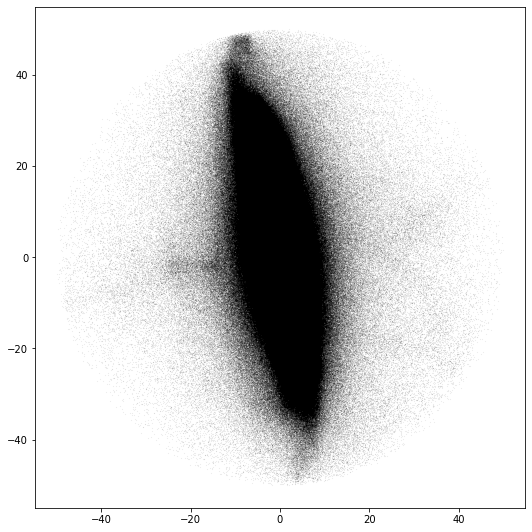

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(x_str[mask],y_str[mask],'.k',markersize=0.05)